<a href="https://colab.research.google.com/github/Yagyachoudhary/Roadmap-To-Learn-Generative-AI-In-2024/blob/main/Packt_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.cluster import KMeans #Kmeans clustering algorithm
from google.colab import drive
drive.mount('/content/drive')
#Importing all the importsant Libraries

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#loading CSVs from csv files to Pandas data frames
Subscription_data = pd.read_csv('/content/drive/MyDrive/CSV/public.subscription_journey  - Sheet1.csv')
Onboarding_data = pd.read_csv('/content/drive/MyDrive/CSV/public.onboarding_user_tags - Sheet1.csv')
#/content/sample_data

In [ ]:
Subscription_data.head() #Checking if Subscription data has been uploaded properly or not


,account_number,account_number.1,sub_start_date,current_rateplan_name
0,eeaf65cf-6f47-4915-8419-db541f1400ec,A-S00062920,2022-04-26 0:00:00,Annual - Free
1,83b8db39-d77c-476a-88ca-204ef5895133,A-S00070405,2022-01-11 0:00:00,Annual - Free
2,99f57bde-e94a-4c06-9b61-ed2a7f90df79,A-S00071775,2022-03-03 0:00:00,Annual - Free
3,6dcb109e-beed-4fcd-870f-7cabf2fbbdb5,A-S00071920,2022-04-05 0:00:00,Annual - Free
4,7745714e-3b52-4d55-8c14-23d9739622b7,A-S00080031,2022-04-06 0:00:00,Annual - Free


In [ ]:
Subscription_data.current_rateplan_name.unique()# We tried to find out the unique kind of plans.

array(['Annual - Free', 'Annual - Launch Offer', 'Monthly',
       'Monthly - Launch Offer', 'Monthly - 7 Day Trial',
       'Monthly - Five Month Offer', 'Monthly - Special Renewal Offer',
       '18 Months - Special Offer', '3 Month Non-recurring',
       'Annual - Special Offer', 'Monthly Plan', 'One Month Plan',
       'Three Month Plan', 'Annual - Exclusive Offer',
       'Monthly - Special Offer', 'Monthly - Bundle Offer',
       'Packt Monthly Subscription', 'Annual - Offer', 'Annual - 50% OFF',
       'Packt for Teams 2019', '18 Months Offer', nan], dtype=object)

In [ ]:
Subscription_data[Subscription_data.current_rateplan_name == 'Annual - Free']
# it is sql equivalent of Select * from Subscription Data where current_rateplan_name == 'Annual - Free'


,account_number,account_number.1,sub_start_date,current_rateplan_name
0,eeaf65cf-6f47-4915-8419-db541f1400ec,A-S00062920,2022-04-26 0:00:00,Annual - Free
1,83b8db39-d77c-476a-88ca-204ef5895133,A-S00070405,2022-01-11 0:00:00,Annual - Free
2,99f57bde-e94a-4c06-9b61-ed2a7f90df79,A-S00071775,2022-03-03 0:00:00,Annual - Free
3,6dcb109e-beed-4fcd-870f-7cabf2fbbdb5,A-S00071920,2022-04-05 0:00:00,Annual - Free
4,7745714e-3b52-4d55-8c14-23d9739622b7,A-S00080031,2022-04-06 0:00:00,Annual - Free
...,...,...,...,...
10529,93fde2b3-c80b-4640-9bd3-e830cd97117f,A-S00274758,2022-03-25 0:00:00,Annual - Free
12708,5a55a65d-725f-478d-b605-8f64f0690c39,A-S00276855,2022-03-24 0:00:00,Annual - Free
12730,0117d30f-c8fc-412e-898b-d45d218921af,A-S00277011,2022-04-14 0:00:00,Annual - Free
13577,765ed3e5-02d2-4588-ae3a-16c398f07175,A-S00275299,2022-04-15 0:00:00,Annual - Free


In [ ]:
g = Subscription_data.groupby('current_rateplan_name')
g

In [ ]:
#for current_rateplan_name,current_rateplan_name_Subscription_data in g:
 #   print(current_rateplan_name)
 #   print(current_rateplan_name_Subscription_data)


In [ ]:
Subscription_data.info()
Subscription_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16955 entries, 0 to 16954
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   account_number         16955 non-null  object
 1   account_number.1       16954 non-null  object
 2   sub_start_date         16954 non-null  object
 3   current_rateplan_name  16954 non-null  object
dtypes: object(4)
memory usage: 530.0+ KB


(16955, 4)

In [ ]:
Onboarding_data.head()
#Checking the Onboarding data

,uuid_id,parent_category,tags,created_at,id
0,00ea0bf0-6eb7-4218-a48a-e32ad195d06d,Programming,Bonita,2022-01-01 17:20:23,110891.0
1,cac908e1-e574-4614-9252-7b2e3a9d221c,Programming,Visual Studio,2022-01-01 1:00:29,106429.0
2,b78d80bf-1914-4719-b82d-c427ac3da40c,Web Development,NGINX,2022-01-01 1:08:16,106465.0
3,b78d80bf-1914-4719-b82d-c427ac3da40c,Web Development,Adobe XD,2022-01-01 1:08:17,106501.0
4,cac908e1-e574-4614-9252-7b2e3a9d221c,Cloud & Networking,Kubernetes,2022-01-01 1:00:30,106434.0


### Counting Disticnt IDs

In [ ]:
distinct_uu_count = Onboarding_data['uuid_id'].nunique()
print("Count of distinct uuu_ID:", distinct_uu_count)
#SQL Equivalent: Select
#Count(distinct uuu_ID)
#From master_data


Count of distinct uuu_ID: 9272


In [ ]:
Onboarding_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169188 entries, 0 to 169187
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   uuid_id          169186 non-null  object 
 1   parent_category  169183 non-null  object 
 2   tags             169183 non-null  object 
 3   created_at       169183 non-null  object 
 4   id               169183 non-null  float64
dtypes: float64(1), object(4)
memory usage: 6.5+ MB


In [ ]:
Onboarding_data.groupby(['parent_category','tags']).size()
Onboarding_data.groupby(['parent_category','tags']).size().to_frame('Count').reset_index()
# reset index has been used for bringing back to data frame
## it is equivalent of "Select Parent_category,tags count(*) form Onboaring_data  group by Parent_category,tags)

,parent_category,tags,Count
0,Cloud & Networking,.NET,14
1,Cloud & Networking,.NET Core,7
2,Cloud & Networking,ASP.NET,38
3,Cloud & Networking,AWS,1315
4,Cloud & Networking,AWS Fargate,48
...,...,...,...
1652,Web Development,phpList,25
1653,Web Development,phpMyAdmin,107
1654,Web Development,pytest,36
1655,Web Development,script.aculo.us,23


In [ ]:
#Adding Month Columns to the Data sets
Onboarding_data['Onboarding_Month'] = Onboarding_data['created_at'].str[0:7]
Onboarding_data.head()
Subscription_data['Subscription_Month'] = Subscription_data['sub_start_date'].str[0:7]
Subscription_data.head()


,account_number,account_number.1,sub_start_date,current_rateplan_name,Subscription_Month
0,eeaf65cf-6f47-4915-8419-db541f1400ec,A-S00062920,2022-04-26 0:00:00,Annual - Free,2022-04
1,83b8db39-d77c-476a-88ca-204ef5895133,A-S00070405,2022-01-11 0:00:00,Annual - Free,2022-01
2,99f57bde-e94a-4c06-9b61-ed2a7f90df79,A-S00071775,2022-03-03 0:00:00,Annual - Free,2022-03
3,6dcb109e-beed-4fcd-870f-7cabf2fbbdb5,A-S00071920,2022-04-05 0:00:00,Annual - Free,2022-04
4,7745714e-3b52-4d55-8c14-23d9739622b7,A-S00080031,2022-04-06 0:00:00,Annual - Free,2022-04


In [ ]:
Onboarding_data.shape
#Subscription_data['account_number'].nunique() #16363
#Onboarding_data['uuid_id'].nunique()#9272
Subscription_data.shape
#multiple accounts

(16955, 5)

### Joinning Both the Data Sets by using Merge Function

In [ ]:
##Merging two tables same as left join
## left_df.merge(right_df, on='user_id', how='left', indicator=True)
DF = Onboarding_data.merge(Subscription_data, left_on= 'uuid_id',right_on = 'account_number', how = 'left', indicator= True )
DF.head()
#DF.shape
#Sql equiavlent: Select * from Subscription_data as a left join Onboarding_data as b on a.uuid_id and b.account_number

,uuid_id,parent_category,tags,created_at,id,Onboarding_Month,account_number,account_number.1,sub_start_date,current_rateplan_name,Subscription_Month,_merge
0,00ea0bf0-6eb7-4218-a48a-e32ad195d06d,Programming,Bonita,2022-01-01 17:20:23,110891.0,2022-01,00ea0bf0-6eb7-4218-a48a-e32ad195d06d,A-S00263882,2022-01-01 0:00:00,Monthly - Special Renewal Offer,2022-01,both
1,cac908e1-e574-4614-9252-7b2e3a9d221c,Programming,Visual Studio,2022-01-01 1:00:29,106429.0,2022-01,cac908e1-e574-4614-9252-7b2e3a9d221c,A-S00263794,2022-01-11 0:00:00,Monthly - Five Month Offer,2022-01,both
2,b78d80bf-1914-4719-b82d-c427ac3da40c,Web Development,NGINX,2022-01-01 1:08:16,106465.0,2022-01,b78d80bf-1914-4719-b82d-c427ac3da40c,A-S00263795,2022-01-01 0:00:00,Monthly - Five Month Offer,2022-01,both
3,b78d80bf-1914-4719-b82d-c427ac3da40c,Web Development,Adobe XD,2022-01-01 1:08:17,106501.0,2022-01,b78d80bf-1914-4719-b82d-c427ac3da40c,A-S00263795,2022-01-01 0:00:00,Monthly - Five Month Offer,2022-01,both
4,cac908e1-e574-4614-9252-7b2e3a9d221c,Cloud & Networking,Kubernetes,2022-01-01 1:00:30,106434.0,2022-01,cac908e1-e574-4614-9252-7b2e3a9d221c,A-S00263794,2022-01-11 0:00:00,Monthly - Five Month Offer,2022-01,both


In [ ]:
#result = master_Data.groupby(['Parent Category', 'Tag'])['uuid'].nunique().reset_index()
User_tags = DF.groupby(['parent_category','tags'])['uuid_id'].nunique().reset_index
#result = result.rename(columns={'uuid': 'tags'})


In [ ]:
#result = master_Data.groupby(['Parent Category', 'Tag'])['uuid'].nunique().reset_index()
qf = DF.groupby(['tags'])['uuid_id'].nunique().reset_index()
#result = result.rename(columns={'uuid': 'tags'})

print(qf)

type(qf)

                            tags  uuid_id
0                           .NET      671
1                      .NET Core     1382
2           .NET Micro Framework        6
3                        3ds Max       15
4                           ABAP       18
..                           ...      ...
965                    vBulletin        8
966                     vRealize       33
967  vRealize Operations Manager       11
968                      vSphere      271
969                     wxPython        8

[970 rows x 2 columns]


pandas.core.frame.DataFrame

In [ ]:
af.to_csv('/content/drive/MyDrive/CSV/UUID.csv', index=False)


### Some Count Distinct Functions with merged Data Sets

In [ ]:
distinct_uuu_count = DF['uuid_id'].nunique()
print("Count of distinct uuu_ID:", distinct_uuu_count)
#Select
#Count(distinct uuu_ID)
#From DF



Count of distinct uuu_ID: 9272


### Checking rows with null tags

In [ ]:
filtered_data = DF[DF['tags'].isnull()]
distinct_notag_count = filtered_data['uuid_id'].nunique()
print("Count of distinct uuu_ID where tags is null:", distinct_notag_count)
#SQL Equivalent :
###Select
#Count(distinct uuu_ID)
#From master_data
#Where tags is null



Count of distinct uuu_ID where tags is null: 3


In [ ]:
filtered_data = DF[DF['tags'].isnull()]
print(filtered_data)

                                     uuid_id parent_category tags created_at  \
176875                                    \.             NaN  NaN        NaN   
176876                                   NaN             NaN  NaN        NaN   
176877                                   NaN             NaN  NaN        NaN   
176878  -- PostgreSQL database dump complete             NaN  NaN        NaN   
176879                                    --             NaN  NaN        NaN   

        id Onboarding_Month account_number account_number.1 sub_start_date  \
176875 NaN              NaN             \.              NaN            NaN   
176876 NaN              NaN            NaN              NaN            NaN   
176877 NaN              NaN            NaN              NaN            NaN   
176878 NaN              NaN            NaN              NaN            NaN   
176879 NaN              NaN            NaN              NaN            NaN   

       current_rateplan_name Subscription_Month   

##User Across different Categories

In [ ]:
R = DF.groupby('parent_category')['uuid_id'].nunique().reset_index()
R = R.rename(columns={'uuid_id': 'User_id'})
R = R.sort_values(by='User_id',ascending= False)
R.reset_index(drop=True, inplace=True)
print(R)
## SQL Equivalent:
#Select
#Parent_category,
#Count(distinct uuu_ID)
#From DF
##Group by
#parent_Category


      parent_category  User_id
0     Web Development     6957
1                Data     2889
2  Cloud & Networking     2708
3         Programming     2459
4            Security     2021
5              Mobile     1014
6    Game Development      911


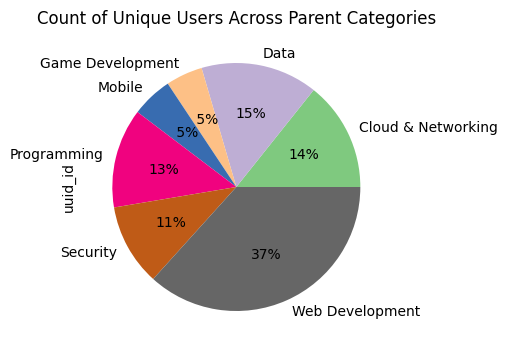

In [ ]:
DF.groupby('parent_category')['uuid_id'].nunique().plot(kind='pie',
                                                        title ='Count of Unique Users Across Parent Categories',cmap='Accent',
                                                        autopct='%2.f%%',figsize=(4,5))
plt.show()



Number of Tags across Parent categories

In [ ]:
T = DF.groupby('parent_category')['tags'].nunique().reset_index()
print(T)
## SQL Equivalent:
#Select
#Parent_category,
#Count(distinct tags)
#From DF
##Group by
#parent_Category

      parent_category  tags
0  Cloud & Networking   293
1                Data   296
2    Game Development   112
3              Mobile    96
4         Programming   413
5            Security    83
6     Web Development   364


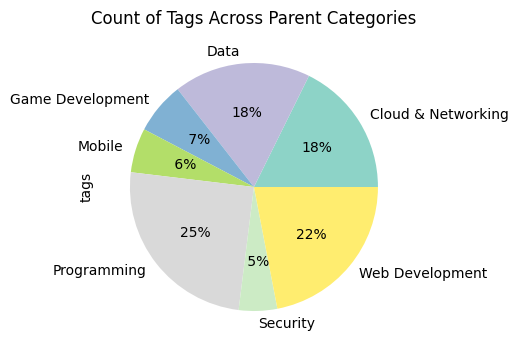

In [ ]:
T = DF.groupby('parent_category')['tags'].nunique().plot(kind='pie',
                                                        title ='Count of Tags Across Parent Categories',cmap='Set3',
                                                        autopct='%2.f%%',figsize=(4,5))
plt.show()

### Finding The Time Difference Between Subscrition_start and tag creation

In [ ]:
DF['sub_start_date']= pd.to_datetime(DF['sub_start_date'])
DF['created_at']= pd.to_datetime(DF['created_at'])
DF['date_difference'] = DF['created_at'] - DF['sub_start_date']
average_difference = DF['date_difference'].mean()
Modal_difference = DF['date_difference'].mode()
Median_difference = DF['date_difference'].median()

print("Average of 'date_difference' column:",average_difference)
print("Median of 'date_difference' column:",Median_difference)
print("Mode of 'date_difference' column:",Modal_difference)





#Master_data['sub_start_date'] = pd.to_datetime(Master_data['sub_start_date'])
#Master_data['created_at'] = pd.to_datetime(Master_data['created_at'])
# to check for negative values

#minimum of sub_start date for every


Average of 'date_difference' column: -3 days +13:06:54.962217437
Median of 'date_difference' column: 0 days 02:46:24
Mode of 'date_difference' column: 0   0 days 02:46:32
Name: date_difference, dtype: timedelta64[ns]


In [ ]:
### Checking Rows which with out tags

In [ ]:
# Create a boolean mask for the condition (difference < 0)
condition = (DF['created_at'] - DF['sub_start_date']) < pd.Timedelta(0)

# Use the boolean mask to select rows where the condition is True
selected_rows = DF[condition]

# Print the selected rows
selected_rows.shape
(176880, 12)


(69293, 13)

### Tag Distribution across Users

In [ ]:
#UU_id wise count of Tags and distribution

print( DF.groupby('uuid_id')['tags'].nunique().reset_index().describe())
# Calculate the maximum and minimum tag counts

#Inferecne: Median Value is 6 tags per user.


              tags
count  9272.000000
mean     10.870794
std      27.589368
min       0.000000
25%       3.000000
50%       6.000000
75%      12.000000
max     970.000000


In [ ]:


# Group by 'Uuid' and calculate the count of distinct 'tags'
result = filtered_data.groupby('uuid_id')['tags'].nunique().reset_index()

# Rename the column to 'tag_count'
result = result.rename(columns={'tags': 'tag_count'})

# Print the result
print((result).describe())

       tag_count
count        3.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0


### Tag Distribution within a Parent Category

In [ ]:
#Web Development Category
WD_category = DF[DF['parent_category'] == 'Web Development']
WD_result = WD_category.groupby('uuid_id')['tags'].nunique().reset_index()
WD_result= WD_result.rename(columns={'tags': 'tag_count'})
print((WD_result).describe())
#SQL Equivalent


         tag_count
count  6957.000000
mean      6.373006
std      13.916106
min       1.000000
25%       2.000000
50%       4.000000
75%       7.000000
max     364.000000


In [ ]:
# Data Category
D_category = DF[DF['parent_category'] == 'Data']
D_result = D_category.groupby('uuid_id')['tags'].nunique().reset_index()
D_result= D_result.rename(columns={'tags': 'tag_count'})
print((D_result).describe())


         tag_count
count  2889.000000
mean      6.128072
std      10.746265
min       1.000000
25%       2.000000
50%       4.000000
75%       7.000000
max     265.000000


In [ ]:
#Cloud & Networking
CN_category = DF[DF['parent_category'] == 'Cloud & Networking']
CN_result = CN_category.groupby('uuid_id')['tags'].nunique().reset_index()
CN_result= CN_result.rename(columns={'tags': 'tag_count'})
print((CN_result).describe())


         tag_count
count  2708.000000
mean      5.961226
std      11.496276
min       1.000000
25%       2.000000
50%       4.000000
75%       7.000000
max     275.000000


In [ ]:
#Programming Category
P_category = DF[DF['parent_category'] == 'Programming']
P_result = P_category.groupby('uuid_id')['tags'].nunique().reset_index()
P_result= P_result.rename(columns={'tags': 'tag_count'})
print((P_result).describe())

         tag_count
count  2459.000000
mean      3.999187
std      13.545031
min       1.000000
25%       1.000000
50%       2.000000
75%       4.000000
max     393.000000


In [ ]:
#Security Category
S_category = DF[DF['parent_category'] == 'Security']
S_result = S_category.groupby('uuid_id')['tags'].nunique().reset_index()
S_result= S_result.rename(columns={'tags': 'tag_count'})
print((S_result).describe())

         tag_count
count  2021.000000
mean      4.795646
std       5.711574
min       1.000000
25%       1.000000
50%       3.000000
75%       6.000000
max      83.000000


In [ ]:
#Mobile Category
M_category = DF[DF['parent_category'] == 'Mobile']
M_result = M_category.groupby('uuid_id')['tags'].nunique().reset_index()
M_result= M_result.rename(columns={'tags': 'tag_count'})
print((M_result).describe())

        tag_count
count  1014.00000
mean      4.13215
std       5.33667
min       1.00000
25%       1.00000
50%       3.00000
75%       5.00000
max      61.00000


In [ ]:
#Game Development
G_category = DF[DF['parent_category'] == 'Game Development']
G_result = G_category.groupby('uuid_id')['tags'].nunique().reset_index()
G_result= G_result.rename(columns={'tags': 'tag_count'})
print((G_result).describe())

        tag_count
count  911.000000
mean     4.231614
std      6.780558
min      1.000000
25%      1.000000
50%      3.000000
75%      5.000000
max     77.000000


In [ ]:
WD_category = DF[DF['parent_category'] == '']
WD_result = WD_category.groupby('uuid_id')['tags'].nunique().reset_index()
WD_result= WD_result.rename(columns={'tags': 'tag_count'})
print((WD_result).describe())








#Web Development       62701
#Data                  34361
#Cloud & Networking    28959
#Programming           15000
#Security              14507
#Mobile                 7933
#Game Development



###Unique Users across different plans


In [ ]:
DP = DF.groupby('current_rateplan_name')['uuid_id'].nunique().reset_index()
DP = DP.rename(columns={'uuid_id': '#users_rateplan'})
DP = DP.sort_values(by='#users_rateplan',ascending = False)
DP.reset_index(drop=True,inplace=True)
print(DP)
#Master_data.groupby('Current_rateplan_name')['Uuu_id'].nunique().reset_index() current_rateplan_name
#(columns={'Uuu_id': 'users_rateplan'})



              current_rateplan_name  #users_rateplan
0        Packt Monthly Subscription             2749
1        Monthly - Five Month Offer             2317
2            Monthly - Launch Offer             2012
3             Monthly - 7 Day Trial             1078
4             Annual - Launch Offer              261
5         18 Months - Special Offer              215
6   Monthly - Special Renewal Offer              175
7           Monthly - Special Offer               88
8            Monthly - Bundle Offer               40
9             3 Month Non-recurring               22
10                 Three Month Plan                9
11           Annual - Special Offer                5
12                   Annual - Offer                3
13                    Annual - Free                1


In [ ]:
#af.to_csv('/content/drive/MyDrive/CSV/UUID.csv', index=False)
DP.to_csv('/content/drive/MyDrive/CSV/plan.csv', index=False)